모델 훈련

# 선형 회귀

간단한 선형 회귀 모델

$$삶의 만족도 = \theta_0 + \theta_1 \times 1인당 GDP$$

- 여기서 theta0, theta1은 모델 파라미터임
- 입력 특성의 가중치 합과 편향(bias) 더해 예측함

$$\hat{y} = \theta_0+\theta_1x_1+\theta_2x_2+\cdots+\theta_nx_n$$

- y^은 예측값
- n은 특성의 수
- x_i는 i번째 특성값
- theta_j는 j번째 모델 파라미터임

더 간단히 쓸 수 있음

$$\hat{y}=h_\theta(x)=\theta\cdot x$$

- theta는 편향 theta0과 theta1에서 thetan까지의 특성 가중치를 담은 모델의 파라미터 벡터임
- x는 x0에서 xn까지 담은 샘플의 특성 벡터임. x0는 항상 1임
- theta x는 벡터 theta와 x의 점곱임
- h_theta는 모델 파라미터 theta를 사용한 가설 함수임

성능지표가 필요
- 가장 널리 사용되는 성능 측정 지표 : 평균 제곱근 오차 (RMSE)
- RMSE를 최소화하는 theta를 찾아야함

- 선형 회귀 모델의 MSE 비용 함수

$$MSE(X, h_\theta) = \frac{1}{m}\sum_{i=1}^{m}(\theta^Tx^{(i)}-y^{i})^2$$

## 정규방정식

- 비용 함수를 최소화하는 theta값을 찾기 위한 **해석적인 방법**이 존재함
    - 결과를 바로 얻을 수 있는 수학 공식을 **정규방정식**이라고 함

$$\hat{\theta}=(X^TX)^{-1}X^Ty$$

- theta^은 비용 함수를 최소화하는 theta값임
- y는 y^(1)부터 y(m)까지를 포함하는 타깃 벡터임

In [1]:
import numpy as np
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
y.shape

(100, 1)

In [3]:
X.shape

(100, 1)

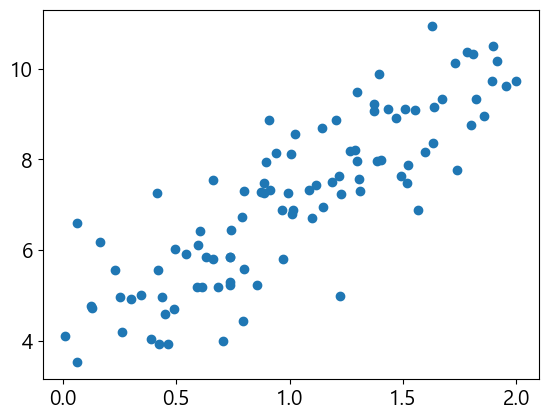

In [4]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시, 마이너스 글자가 깨지는 현상을 해결

plt.scatter(X,y)
plt.show()

- 정규방정식을 사용해 theta를 계산하는 방법

In [5]:
X_b = np.c_[np.ones((100,1)), X] # 모든 샘플에 x0 = 1 을 추가함
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
X_b

array([[1.        , 0.34474506],
       [1.        , 0.7358074 ],
       [1.        , 0.42352451],
       [1.        , 1.51010343],
       [1.        , 1.67242131],
       [1.        , 0.30170789],
       [1.        , 1.55229968],
       [1.        , 1.89119459],
       [1.        , 0.06208359],
       [1.        , 0.68638886],
       [1.        , 0.88736384],
       [1.        , 1.51717557],
       [1.        , 1.8979654 ],
       [1.        , 1.40333518],
       [1.        , 1.20264396],
       [1.        , 1.14508781],
       [1.        , 0.62933881],
       [1.        , 0.12234639],
       [1.        , 1.11693508],
       [1.        , 0.22832007],
       [1.        , 0.25197204],
       [1.        , 0.70762645],
       [1.        , 1.38440585],
       [1.        , 1.29791313],
       [1.        , 1.18520201],
       [1.        , 1.01056579],
       [1.        , 1.80199541],
       [1.        , 1.63383427],
       [1.        , 0.43765987],
       [1.        , 1.59730454],
       [1.

- 이 데이터를 생성하기 위해 사용한 함수는 y = 4 + 3x1 + 가우시안_잡음 임

In [7]:
theta_best

array([[4.07314452],
       [2.99372278]])

- theta0 = 4,215와 theta1 = 2,770 대신 theta0 = 4와 theta1 = 3을 기대했었으나 정확하게 재현하지 못함

---
- theta^을 사용해 예측해보겠음

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # 모든 샘플에 x0 = 1을 추가함
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.07314452],
       [10.06059007]])

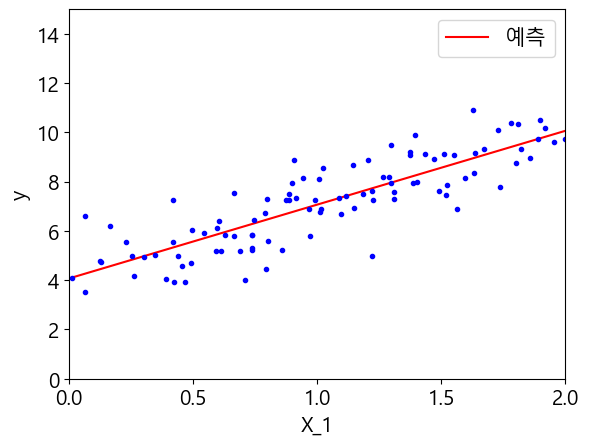

In [9]:
plt.plot(X_new, y_predict, "r-", label = "예측")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel('X_1')
plt.ylabel('y')
plt.legend()
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [11]:
lin_reg.intercept_, lin_reg.coef_

(array([4.07314452]), array([[2.99372278]]))

In [12]:
lin_reg.predict(X_new)

array([[ 4.07314452],
       [10.06059007]])

- scipy.linalg.lstsq(0 함수를 기반으로 하기 때문에 이 함수를 직접 호출할 수 있음

In [13]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.07314452],
       [2.99372278]])

- 이 함수는 theta^ = X^+ y 를 계산함
    - 여기서 X^+는 **유사역행렬** 임
        - np.linalg.pinv()로 유사역행렬을 직접 구할 수 있음

In [14]:
np.linalg.pinv(X_b).dot(y)

array([[4.07314452],
       [2.99372278]])

- 유사역행렬 자체는 **특잇값 분해 (SVD)** 라 부르는 표준 행렬 분해 기법을 사용해 계산됨
- SVD는 훈련 세트 행렬 X를 3개의 행렬 곱셉 
$U\sum U^T$
로 분해함

- 유사역행렬은 
$X^+=V\sum + U^T$
로 계산됨

1. $\sum +$를 계산하기 위해 $\sum$을 먼저 구하고 어떤 낮은 임곗값보다 작은 모든 수를 0으로 바꿈
2. 그 다음 0이 아닌 모든 값을 역수로 치환함
3. 만들어진 행렬을 전치함

**정규방정식을 계산하는 것보다 이 방식이 훨씬 효율적임**

- 극단적인 경우도 처리할 수 있음
- m < n이거나 어떤 특성이 중복되어 행렬 $X^TX$의 역행렬이 없다면 정규방정식이 작동하지 않음
- 하지만 유사역행렬은 항상 구할 수 있음

## 계산 복잡도

- 정규방정식은 $(n+1) \times (n+1)$ 크기가 되는 $X^TX$의 역행렬을 계산함
- 역행렬을 계산하는 **계산 복잡도**는 일반적으로 $O(n^{2.4})$에서 $O(n^3)$ 사이임
    - 즉 특성 수가 두 배로 늘어나면 계산 시간이 대략 5.3에서 8배로 증가

- 사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법은 약 $O(n^2)$임

# 경사 하강법

**경사 하강법 gradient descent (GD)** 은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘임
- 경사 하강법의 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것임
- 파라미터 벡터 theta에 대해 비용 함수의 현재 그레이디언트를 계산하고 감소하는 방향으로 진행함
    - 그레이디언트가 0이 되면 최솟값에 도달한 것임
- theta를 임의의 값으로 시작해서( **무작위 초기화** ) 한 번에 조금씩 비용 함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킴

- 경사 하강법에서 중요한 파라미터는 스텝의 크기로 **학습률** 하이퍼파라미터로 결정됨
    - 학습률이 너무 작으면 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸림
    - 학습률이 너무 크면 발산하게 되어 적절한 해법을 찾지 못함

경사하강법의 문제
- 무작위 초기화로 인해 **전역 최솟값 global minimum** 보다 **지역 최솟값 local minimum**에 수렴함

- 선형 회귀를 위한 MSE 비용 함수는 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 **볼록 함수 convex function**임
    - 지역 최솟값은 없다는 뜻
---
- 특성들의 스케일이 매우 다르면 길쭉한 모양이 됨
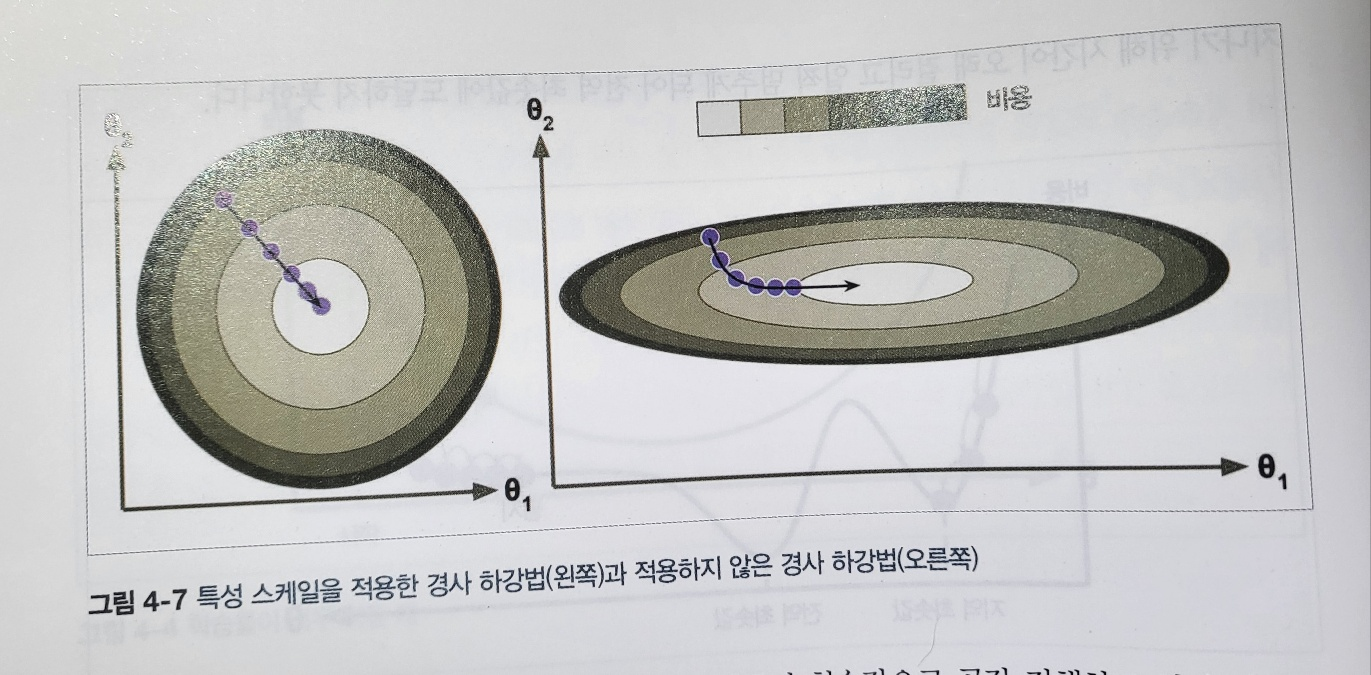
- 왼쪽은 빠르게 도달하겠지만 오른쪽은 길게 돌아서 가기 때문에 오래걸림

- 모델 훈련이 비용 함수를 최소화하는 모델 파라미터의 조합을 찾는 일임을 설명함
- 모델의 **파라미터 공간**에서 찾는다고 말함
- 모델이 가진 파라미터가 많을수록 이 공간의 차원은 커지고 검색이 더 어려워짐

## 배치 경사 하강법

경사 하강법을 구현하려면 각 모델 파라미터 theta_j에 대해 비용 함수의 그레이디언트를 계산해야함
- 즉, theta_j가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야함
- 이를 **편도함수 partial derivative**라고 함

$$\frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^Tx^{(i)}-y^{(i)})x^{(i)}_j$$

- 한꺼번에 계산하여 비용 함수의 편도함수를 담는 비용 함수의 그레이디언트 벡터는 다음과 같음

$$\nabla_\theta MSE(\theta) = \begin{pmatrix}\frac{\partial}{\partial\theta_0}MSE(\theta)\\\frac{\partial}{\partial\theta_1}MSE(\theta)\\\frac{\partial}{\partial\theta_2}MSE(\theta)\\\cdots\\\frac{\partial}{\partial\theta_n}MSE(\theta) \\\end{pmatrix} = \frac{2}{m}X^T(X\theta-y)$$



- 위 공식은 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산함
    - **배치 경사 하강법**이라고도 함
    - 매 스텝에서 훈련 데이터 전체를 사용함
        - 매우 큰 훈련 세트에서는 매우 느림
        - 하지만 특성 수에 민감하지 않음
            - 수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규방정식이나 SVD 분해보다 경사 하강법이 더 좋음

- 위로 향하는 그레이디언트 벡터가 구해지면 반대 방향인 아래로 가야함
    - 즉 $\theta$에서 $\nabla_\theta MSE(\theta)$를 빼야 한다는 뜻임
    - 여기서 학습률 $\eta$가 사용됨
    - 내려가는 스텝의 크기를 결정하기 위해 그레이디언트 벡터에 $\eta$를 곱함

$$\theta^{(next step)} = \theta - \eta \nabla_\theta MSE(\theta)$$

In [15]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [16]:
theta

array([[4.07314452],
       [2.99372278]])

- 정규방정식으로 찾은 것과 정확히 같음
- 학습률을 완전히 바꿔보면 어떻게 될까?

In [17]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

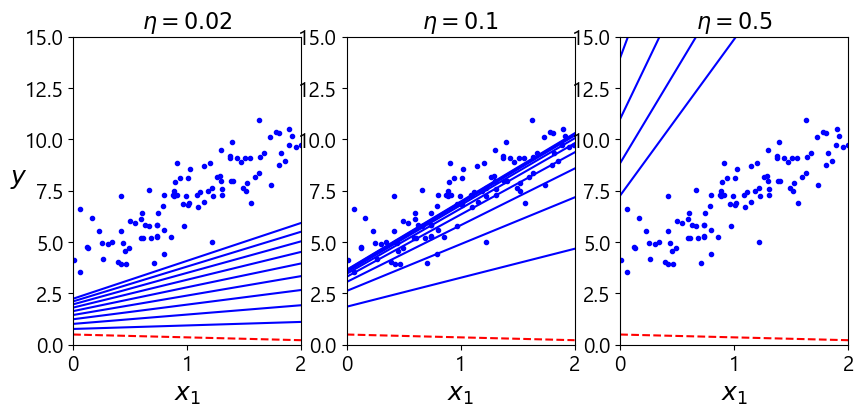

In [18]:

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

- 왼쪽은 학습률이 너무 낮음
- 시간이 오래 걸릴 것임
- 가운데는 학습률이 아주 적당해 보임
- 오른쪽은 학습률이 매우 커보임
---
- 적절한 학습률을 찾기 위해 그리드 탐색 사용
- 반복 횟수를 아주 크게 지정하고 그레이디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 값 (**허용오차 tolerance**)보다 작아지면 경사 하강법이 최솟값에 도달한 것이므로 알고리즘을 중지함

## 확률적 경사 하강법

배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계산한다는 것

즉 훈련 세트가 커지면 매우 느려짐

이와 정 반대로 **확률적 경사 하강법**은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산함

- 훨씬 빨라짐
- 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있음

--- 
하지만 배치 경사 하강법보다 훨씬 불안정함

- 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래로 요동치며 평균적으로 감소함
- 시간이 지나면 최솟값에 매우 근접하겠지만 요동이 지속되면서 최솟값에 안착하지 못할 것임
- 알고리즘이 멈출 때 좋은 파라미터가 구해지겠지만 최적치는 아님
---
- 비용 함수가 매우 불규칙할 때 지역 최솟값을 건너뛰도록 도와주므로 전역 최솟값을 찾을 가능성이 높음
- 하지만 전역 최솟값에는 다다르지 못한다는 점이 단점임
---
- 이 딜레마를 해결할 방법은 **학습률을 점진적으로 감소시키는 것**임
- 시작할 때는 크게하고 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게끔 만듦
- 이 과정이 금속공학 분야에서 가열한 금속을 천천히 냉각시키는 어닐링 annealing (풀림) 과정에서 영감을 얻은 **달금질 기법 simulated annealing** 알고리즘과 유사함
- 매 반복에서 학습률을 결정하는 함수를 **학습 스케줄**이라고 부름
- 학습률이 너무 빨리 줄어들면 지역 최솟값에 갇히거나 최솟값까지 가는 중간에 멈춰버릴 수 있음
- 학습률을 너무 천천히 줄어들면 최솟값 주변을 맴돌거나 너무 일찍 중지해서 지역 최솟값에 머무를 수 있음

In [19]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [20]:
theta

array([[3.98510685],
       [3.00060953]])

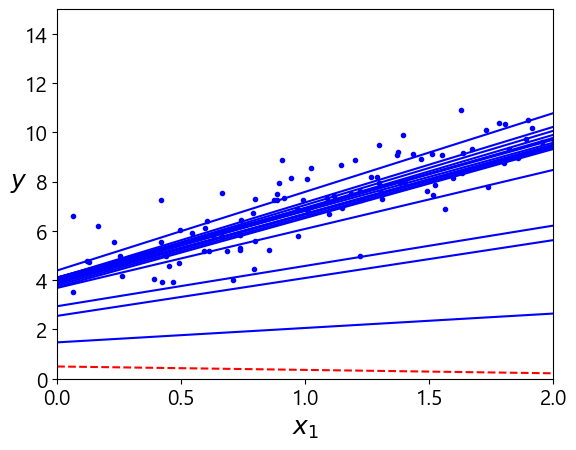

In [21]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()                                           # not shown

- 샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고 어떤 샘플은 전혀 선택되지 못할 수도 있음
- 알고리즘이 에포크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 차례대로 하나씩 선택하고 다음 에포크에서 다시 썩는 식의 방법을 사용할 수 있음
    - 하지만 이렇게 하면 더 늦게 수렴함

- 사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화하는 SGDRegressor 클래스를 사용함

In [22]:
from sklearn.linear_model import SGDRegressor
# max_iter 에포크
# 0.001보다 적게 손실이 줄어들 때까지 실행함 (tol=1e-3)
# 학습률 0.1로 기본 학습 스케줄을 사용함
# 규제 없음 (penalty=None)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [23]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.07337282]), array([3.00912528]))

- 정규방정식으로 구한 것과 매우 비슷한 값을 얻었음

## 미니배치 경사 하강법

**미니배치 경사 하강법** : 각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그레이디언트를 계산하는 것이 아니라 **미니배치**라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산함

- 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상임
- 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직임
- 하지만 지역 최솟값에서 빠져나오기가 더 힘들수도 있음

In [24]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [25]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

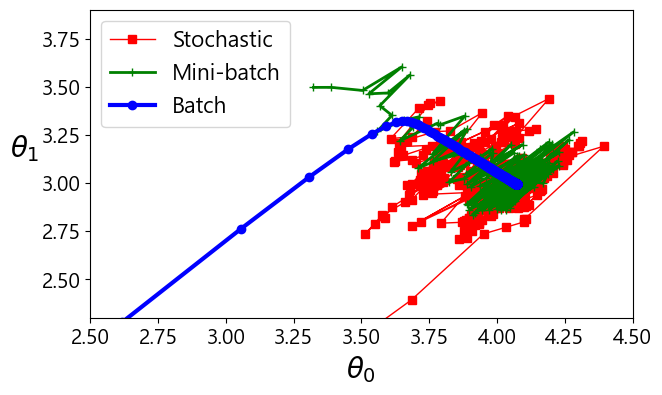

In [26]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

- 파라미터 공간에서 움직인 경로임
- 모두 최솟값 근처에 도달했지만 배치 경사 하강법의 경로가 실제로 최솟값에 멈춘 반면 , 나머지는 맴돌고 있음
---
- 배치 경사 하강법은 매 스텝에서 많은 시간이 소요되고 확률적 경사 하강법과 미니배치 경사 하강법도 적절한 학습 스케줄을 사용하면 최솟값에 도달할 수 있음

논의한 알고리즘으로 선형 회귀를 사용해 비교해보겠음

<font color="red">정리</font>

|알고리즘|m이 클 때|외부 메모리 학습 지원|n이 클 때|하이퍼 파라미터 수|스케일 조정 필요|사이킷런|
|:---|:---|:---|:---|:---|:---|:---|
|정규방정식|빠름|No|느림|0|No|N/A|
|SVD|빠름|No|느림|0|No|LinearRegression|
|배치 경사 하강법|느림|No|빠름|2|Yes|SGDRegressor|
|확률적 경사 하강법|빠름|Yes|빠름|$\geq$ 2|Yes|SGDRegressor|
|미니배치 경사 하강법|빠름|Yes|빠름|$\geq$ 2|Yes|SGDRegressor|

# 다항 회귀

가지고 있는 데이터가 단순한 직선보다 복잡한 형태라면?
- 비선형 데이터를 학습하는 데 선형 모델을 사용할 수 있음
    - 각 특성의 거듭제곱을 새로운 특성으로 추가하고 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것임

**이러한 기법을 다항 회귀라고 함**

- **2차방정식**으로 비선형 데이터를 생성하겠음

In [27]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

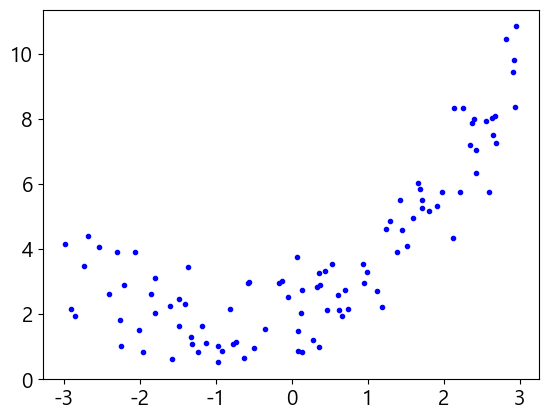

In [28]:
plt.plot(X, y, 'b.')
plt.show()

- 직선은 이 데이터에 잘 맞지 않을 것임
- 사이킷런의 PolynomialFeatures를 사용해 훈련 데이터를 변환해보겠음

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.38942838])

In [30]:
X_poly[0]

array([2.38942838, 5.709368  ])

- 새로운 값이 하나 추가된 것을 볼 수 있음

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

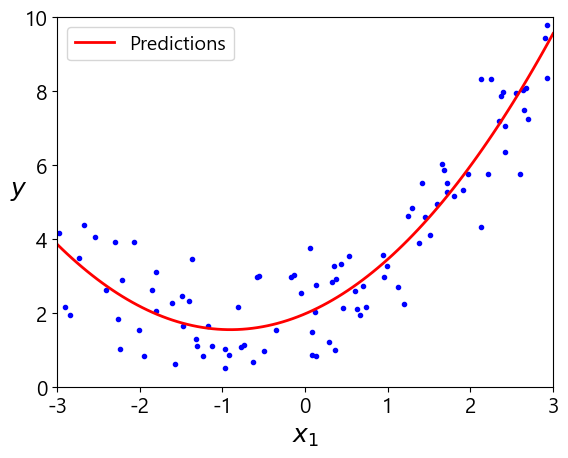

In [32]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

- 실제 원래 함수가 $y=0.5x^2_1+1.0x_1+2.0+가우시안 잡음$이고 예측된 모델은 $\hat{y}=0.56x^2_1+0.93x_1+1.78$임
- 특성이 여러 개일 때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있음
    - 두 개의 특성 a,b가 있을 때 degree=3으로 하면 a^2, a^3, b^2, b^3 뿐만 아니라 ab, a^2b, ab^2도 특성으로 추가함

# 학습 곡선

너무 고차원으로 학습하면 과대적합이 될 수 있음

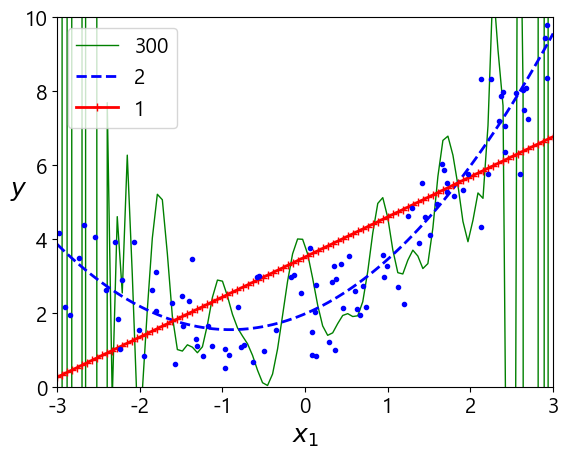

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

- 반면 선형 모델은 과소적합임
---
**어떤 모델이 적절한지 결정하는 방법?**

1. 훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘다면 모델이 과대적합이 된 것임
2. **학습 곡선** 살펴보기
    - 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")
    plt.legend()
    plt.ylim([0, 3])
    plt.xlabel("훈련 세트 크기")
    plt.ylabel("RMSE")

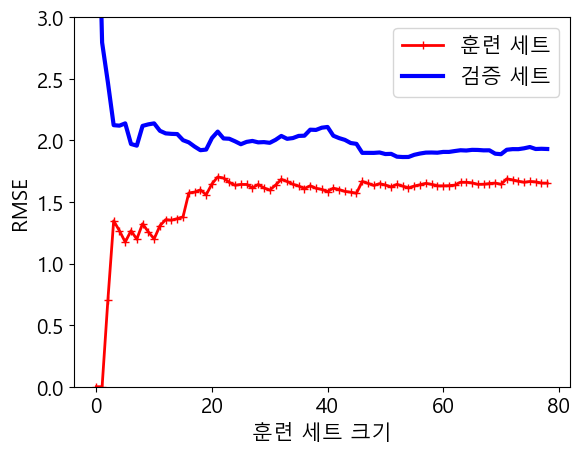

In [35]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

- 과소적합으로 판별됨

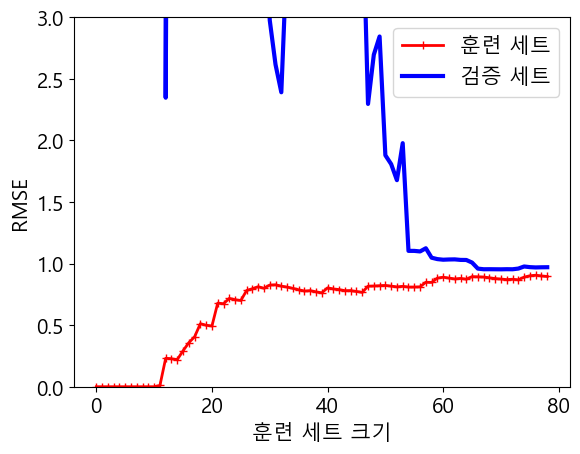

In [36]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

이 학습 곡선은 이전과 비슷해 보이지만 두 가지 매우 중요한 차이점이 있음
1. 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 나음
2. 두 곡선 사이에 공간이 있음. 즉, 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻
    - 과대적합
        - 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워짐

---
<font color="red">**편향/분산 트레이드오프**</font>

통계학과 머신러닝에서 나온 중요한 이론 하나는 모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현할 수 있다는 사실임

- **편향**
    - 일반화 오차 중에서 편향은 잘못된 가정으로 인한 것. 예를 들어 데이터가 실제로는 2차인데 선형으로 가정하는 경우
    - 편향이 큰 모델은 훈련 데이터에 과소적합되기 쉬움


- **분산**
    - 분산은 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타남
    - 자유도가 높은 모델이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향이 있음


- **줄일 수 없는 오차**
    - 데이터 자체에 있는 잡음 때문에 발생. 오차를 줄일 수 있는 유일한 방법은 잡음을 제거하는 일임. 이상치를 발견해 제거함
    
    
모델의 복잡도가 커지면 통상적으로 분산이 늘어다고 편향은 줄어듦. 

반대로 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아짐. 

*이에 트레이드오프라고 부름*

# 규제가 있는 선형 모델

과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것임
- 자유도를 줄이면 데이터에 과대적합되기 더 어려워짐
- 다항 회귀 모델을 규제하는 간단한 방법은 차수를 감소시키는 것임

- 선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가함
- 가중치를 제한하는 '릿지' 회귀, '라쏘' 회귀, 엘라스틱넷이 있음

## 릿지 회귀

**릿지 ridge 회귀(또는 티호노프 Tikhonov 규제)** 는 규제가 추가된 선형 회귀 버전임

- 규제항목에 $\alpha\sum_{i=1}^{n}\theta^2_i$ 비용 함수가 추가됨
- 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 노력함
- 규제항은 훈련하는 동안에만 비용 함수에 추가됨
- 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가함

<font color="green">NOTE_</font>

훈련하는 동안 사용되는 비용 함수와 테스트에서 사용되는 성능 지표는 다름
- 훈련에 사용되는 비용 함수는 최적화를 위해 미분 가능해야하기 때문
- 테스트에 사용되는 성능 지표는 최종 목표에 가능한 한 가까워야 함

하이퍼파라미터 $\alpha$는 모델을 얼마나 많이 규제할지 조절함
- $\alpha$가 0이면 선형 회귀와 같아짐
- $\alpha$가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 됨

릿지 회귀의 비용 함수

$$J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^{n}\theta^2_i$$

- 편향 $\theta_0$는 규제되지 않음
- $w$를 특성의 가중치 벡터($\theta_1$에서 $\theta_n$)라고 정의하면 규제항은 $1/2(||w||_2)^2$과 같음
- 여기서 $||\cdot||_2$가 가중치 벡터의 $l_2$의 노름임
- 경사 하강법에 적용하려면 MSE 그레이디언트 벡터에 $\alpha w$를 더하면 됨

In [37]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [38]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [39]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

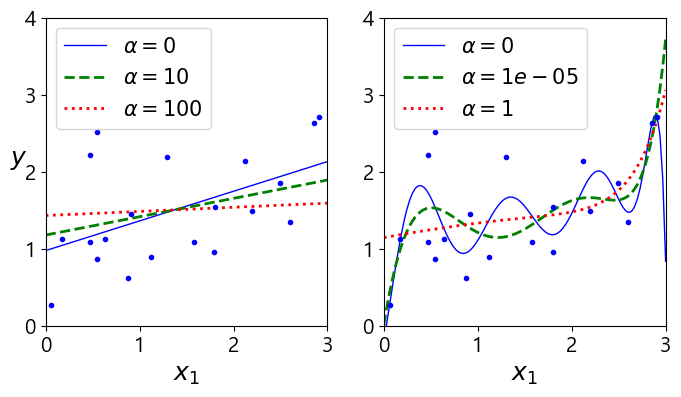

In [40]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

- $\alpha$가 증가할수록 직선에 가깝고 평균값에 근처한다는 것을 볼 수 있음
    - 즉 모델의 분산은 커지지만 편향은 커지게 됨

- 선형 회귀와 마찬가지로 릿지 회귀를 계산하기 위해 정규방정식을 사용할 수도 있고 경사 하강법을 사용할 수도 있음


릿지 회귀의 정규방정식

$$\hat{\theta}=(X^TX+\alpha A)^{-1}X^Ty$$

- 여기서 $A$는 편향에 해당하는 맨 왼쪽 위의 원소가 0인 $(n+1)\times(n+1)$의 단위행렬임

- 여기서 숄레스키가 발견한 행렬 분해를 사용하여 변형한 방정식을 사용함

In [41]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

- 다음은 확률적 경사 하강법을 사용했을 때임

In [42]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.46543286])

- penalty 매개변수는 사용할 규제를 지정함
- "l2"는 SGD가 비용 함수에 가중치 벡터의 $l_2$ 노름의 제곱을 2로 나눈 규제항을 추가하게 만듦
    - 즉, 릿지 회귀와 같음

## 라쏘 회귀

**라쏘 (Lasso) 회귀**는 선형 회귀의 또 다른 규제된 버전임

- 릿지 회귀처럼 비용 함수에 규제항을 더하지만 $l_2$ 노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 $l_1$ 노름을 사용함

라쏘 회귀의 비용 함수

$$J(\theta) = MSE(\theta)+\alpha\sum^n_{i=1}|\theta_i|$$

- 그래프는 릿지 모델 대신 라쏘 모델과 조금 더 작은 $\alpha$값을 사용함

C:\Users\hansol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


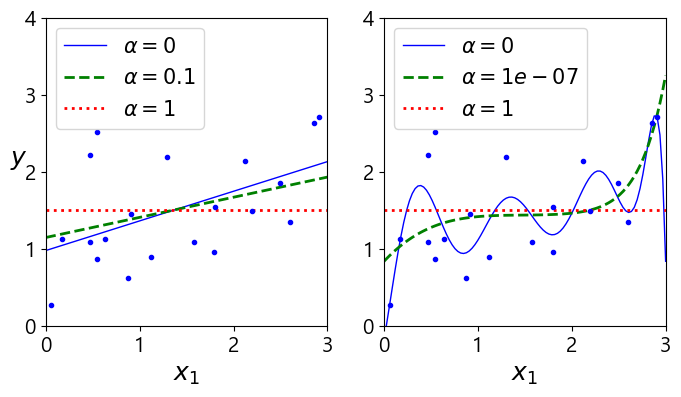

In [43]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

- 라쏘 회귀의 중요한 특징은 덜 중요한 특성의 가중치를 제거하려고 한다는 점임
- 라쏘 회귀는 자동으로 특성 선택을 하고 **희소 모델**을 만듦


In [44]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

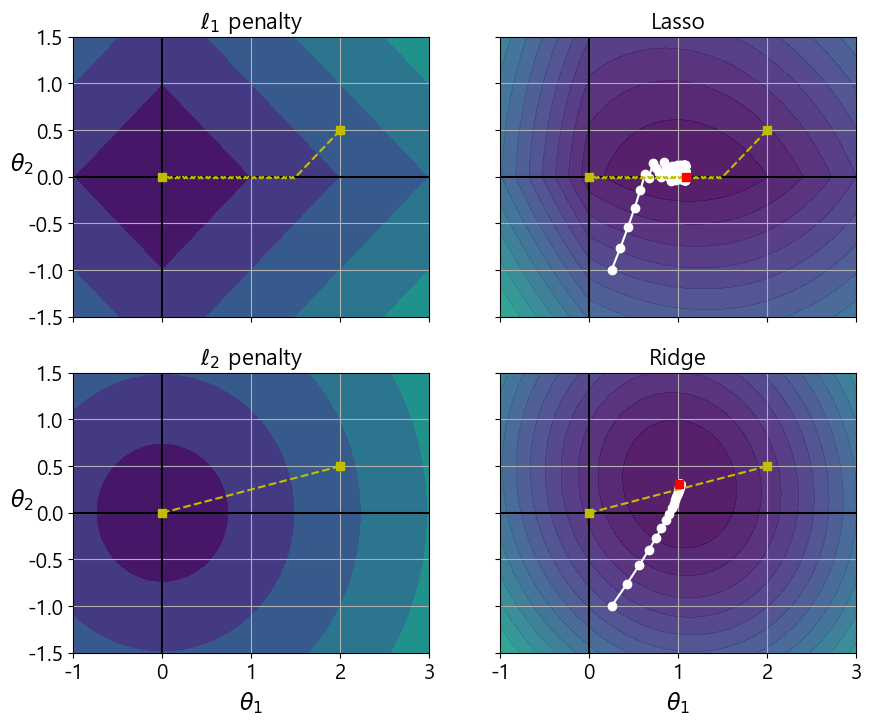

In [45]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

plt.show()

- 두 축은 모델 파라미터 두 개를 나타내고 배경의 등고선은 각기 다른 손실 함수를 나타냄
- 왼쪽 위 그래프의 등고선은 $l_1$ 손실 $(|\theta_1|+|\theta_2|)$을 나타냄
- 축에 가까워지면서 선형적으로 줄어듦
- 그레이디언트는 0에서 정의되지 않기 때문에 진동이 조금 있음
- 아래 두 개의 그래프도 동이랗지만 $l_2$ 패널티를 사용함
- $l_2$ 손실은 원점에 가까울수록 줄어드는 것을 볼 수 있음

릿지와 라쏘의 다른 점
1. 파라미터가 전역 최적점에 가까워질수록 그레이디언트가 작아짐
    - 경사 하강법이 자동으로 느려지고 수렴에 도움이 됨(진동이 없음)
2. $\alpha$값을 증가시킬수록 최적의 파라미터가 원점에 더 가까워짐. 하지만 0이 되지는 않음

- 라쏘의 비용 함수는 $\theta_i=0(i=1,2,\cdots,n)$ 에서 미분 가능하지 않음
- 하지만 $\theta_i=0$일 때 **서브그레이디언트 벡트 g**를 사용하면 경사 하강법을 적용하는 데 문제가 없음

라쏘 회귀의 서브그레이디언트 벡터

$$g(\theta,J)=\nabla_\theta MSE(\theta)+\alpha\begin{pmatrix}sign(\theta_1)\\sign(\theta_2)\\\cdots\\sign(\theta_n)\\\end{pmatrix} 여기서 sign(\theta_i)=\begin{cases}
-1 & \theta_i < 0 \mbox{일 때}\\
0 & \theta_i = 0 \mbox{일 때}\\
+1 & \theta_i > 0 \mbox{일 때}\\
\end{cases}$$

In [46]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

- Lasso 대신 SGDRegressor(penalty="l1")을 사용할 수도 있음

## 엘라스틱넷

**엘라스틱넷**은 릿지 회귀와 라쏘 회귀를 절충한 모델임

- 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 r을 사용해 조절함
    - r=0이면 릿지 회귀, r=1이면 라쏘 회귀

$$J(\theta) = MSE(\theta)+r\alpha\sum^n_{i=1}|\theta_i|+\frac{1-r}{2}\alpha\sum^n_{i=1}\theta^2_i$$

<font color="red">그럼 언제 어떤 모델을 사용해야 할까?</font>

- 일반적으로 평범한 선형 회귀는 피해야함
- 릿지가 기본이 되지만 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 나음
    - 불필요한 특성의 가중치를 0으로 만들어주기 때문임
- 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 라쏘가 문제가 있어 엘라스틱넷을 선호함


In [47]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

## 조기종료

검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것임

In [48]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [49]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

- warm_start=True로 지정하면 fit() 메서드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어감

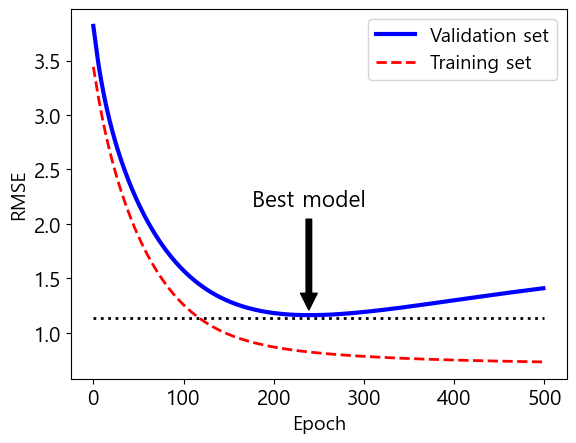

In [50]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

- 배치 하강법으로 훈련시킨 복잡한 모델
- 에포크가 진행됨에 따라 알고리즘이 점차 학습되어 훈련 세트에 대한 예측 에러 (RMSE)와 검증 세트에 대한 예측 에러가 줄어듦
- 하지만 검증 에러가 멈추었더가 다시 상승함
    - 모델이 훈련 데이터에 과대적합되기 시작하는 것을 의미함

# 로지스틱 회귀

회귀 알고리즘은 분류에서도 사용할 수 있음. (그 반대의 경우도 있음)
- **로지스틱 회귀**는 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용됨
- 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측함

## 확률 추정

- 선형 회귀 모델과 같이 로지스틱 회귀 모델은 입력 특성의 가중치 합을 계산함 (그리고 편향을 더함)
- 대신 선형 회귀처럼 바로 결과를 출력하지 않고 결괏값의 **로지스틱**을 출력함
$$\hat{p}=h_\theta(x)=\sigma(\theta^Tx)$$

- 로지스틱($\sigma(\cdot)$)은 0과 1 사이의 값을 출력하는 **시그모이드 함수**임
$$\sigma(t)=\frac{1}{1+exp(-t)}$$

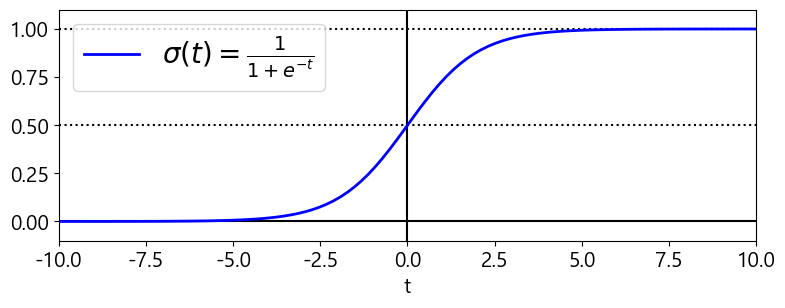

In [51]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

- 로지스틱 회귀 모델이 샘플 x가 양성 클래스에 속할 확률 $\hat{p}=h_\theta(x)$를 추정하면 이에 대한 예측 $\hat{y}$을 쉽게 구할 수 있음

$\hat{y}= \begin{cases}
0 & \hat{p} < 0.5 \mbox{일 때}\\
1 & \hat{p} \geq 0.5 \mbox{일 때}\\
\end{cases}$

- t < 0 이면 $\sigma(t) < 0.5$이고, t >= 0 이면 $\sigma(t) \geq 0.5$ 임
    - 로지스틱 회귀 모델은 $\theta^Tx$가 양수일 때 1이라고 예측하고 음수일 때 0이라고 예측함

## 훈련과 비용 함수

- 훈련의 목적은 양성 샘플(y=1)에 대해서는 높은 확률을 추정하고 음성 샘플(y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 $\theta$를 찾는 것임

$c(\theta)=\begin{cases}
-log(\hat{p}) & y = 1 일 때 \\
-log(1-\hat{p}) & y = 0 일 때 \\
\end{cases}$

- t가 0에 가까워지면 -log(t)가 매우 커지므로 타당하다고 볼 수 있음
- 전체 훈련 세트에 대한 비용 함수는 모든 훈련 샘플의 비용을 평균한 것임
    - 이를 로그 손실이라 부르며 하나의 식으로 쓸 수 있음

$$J(\theta)=-\frac{1}{m}\sum^{m}_{i=1}[y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})]$$

- 이 비용 함수의 최솟값을 계산하는 알려진 해가 없음
- 하지만 이 비용 함수는 볼록 함수이므로 경사 하강법이 전역 최솟값을 찾을 수 있음
- j번째 모델 파라미터 $\theta_j$에 대해 편미분을 진행하면 다음과 같음

$$\frac{\partial}{\partial\theta_j}J(\theta)=\frac{1}{m}\sum^m_{i=1}(\sigma(\theta^Tx^{(i)})-y^{(i)})x^{(i)}_j$$

## 결정 경계

로지스틱 회귀를 설명하기 위해 붓꽃 데이터셋을 사용하겠음

In [52]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [53]:
X = iris["data"][:,3:] # 꽃잎의 너비
y = (iris["target"]==2).astype(np.int) # 1 Iris-Virginica면 1, 그렇지 않으면 0

C:\Users\hansol\AppData\Local\Temp\ipykernel_2380\3109444379.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"]==2).astype(np.int) # 1 Iris-Virginica면 1, 그렇지 않으면 0


In [54]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

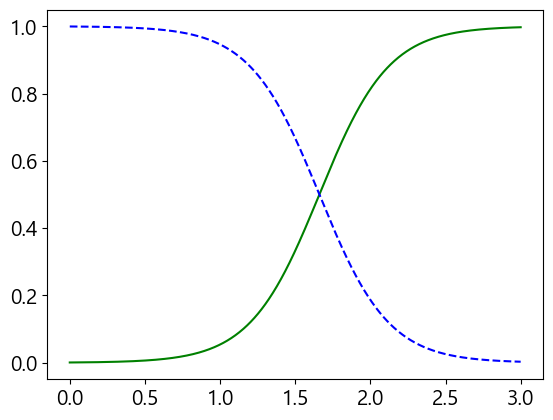

In [55]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
# 다음은 이미지를 미려하게 출력하기 위한 맷플롯립 코드가 이어짐

C:\Users\hansol\anaconda3\lib\site-packages\matplotlib\patches.py:1450: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


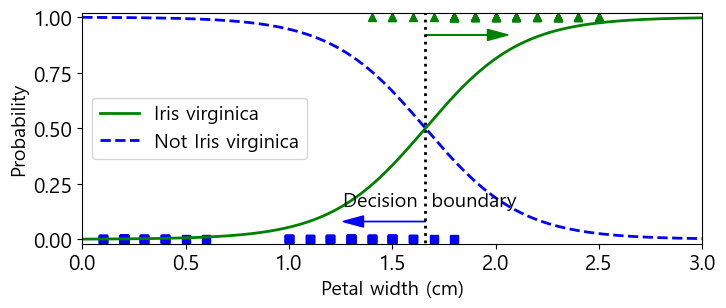

In [56]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

- Iris-Verginica의 꽃잎 너비는 1.4~2.5cm에 분포함
- 반면 다른 붓꽃은 일반적으로 꽃잎 너비가 더 작아 0.1~1.8cm에 분포함
- 그래서 약간 중첩되는 부분이 있음
- 양쪽의 확률이 똑같이 50%가 되는 1.6cm 근방에서 **결정 경계**가 만들어짐

In [57]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

C:\Users\hansol\AppData\Local\Temp\ipykernel_2380\1485464569.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


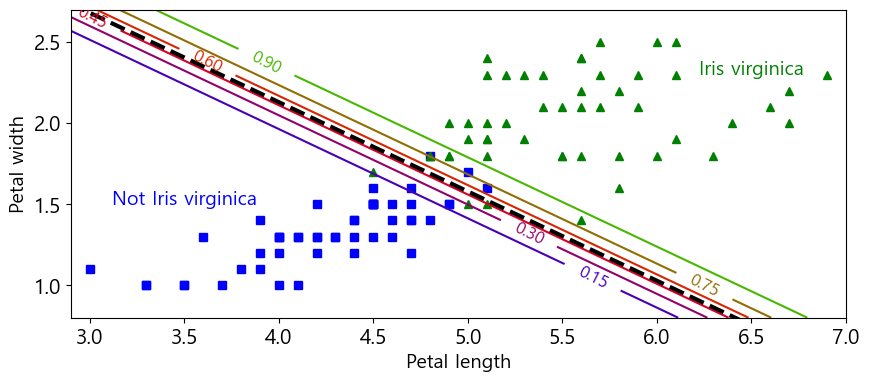

In [58]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

- 점선은 모델이 50% 확률을 추정하는 지점임
    - 모델의 결정 경계
- 경계는 선형임
- 선을 넘어서는 90% 이상의 확률로 Iris-Virginica라고 판단함

- 다른 선형 모델처럼 로지스틱 회귀 모델도 $l_1, l_2$ 페널티를 사용하여 규제할 수 있음

## 소프트맥스 회귀

로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있음
- 이를 **소프트맥스 회귀** 또는 **다항 로지스틱 회귀**라고 함

샘플 x가 주어지면 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 $s_k(x)$를 계산하고 그 점수에 **소프트맥스 함수**를 적용하여 각 클래스의 확률을 추정함


$$s_k(x)=(\theta^{(k)})^Tx$$

- 각 클래스는 자신만의 파라미터 벡터 $\theta^{(k)}$가 있음
- 이 벡터들은 **파라미터 행렬** $\Theta$에 행으로 저장됨
- 샘플 x에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수를 통과시켜 클래스 k에 속할 확률 $\hat{p}_k$을 추정할 수 있음
    - 이 함수는 각 점수에 지수 함수를 적용한 후 정규화함

$$\hat{p}_k=\sigma(s(x))_k=\frac{exp(s_k(x))}{\sum^K_{j=1}exp(s_j(x))}$$

- K는 클래스의 수
- $s(x)$는 샘플 x에 대한 각 클래스의 점수를 담은 벡터
- $\sigma(s(x))_k$는 샘플 x에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 k에 속할 추정 확률임

- 로지스틱 회귀 분류기와 마찬가지로 소프트맥스 회귀 분류기는 추정 확률이 가장 높은 클래스를 선택함

$$\hat{y}=arg_kmax\sigma(s(x))_k=arg_kmaxs_k(x)=arg_kmax((\Theta^{(k)})^Tx)$$

- argmax 연산은 함수를 최대화하는 변수의 값을 반환함

- **크로스 엔트로피** 비용 함수를 최소화하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제함

$$J(\Theta)=-\frac{1}{m}\sum^m_{i=1}\sum^K_{k=1}y^{(i)}_klog(\hat{p}_k^{(k)})$$

- 이 비용 함수의 $\nabla_{\theta^{(k)}}J(\Theta)=\frac{1}{m}\sum^m_{i=1}(\hat{p}^{(i)}_k-y^{(i)}_k)x^{(i)}$

- 각 클래스에 대한 그레이디언트 벡터를 계산할 수 있으므로 비용 함수를 최소화하기 위한 파라미터 행렬 $\Theta$를 찾기 위해 경사 하강법을 사용할 수 있음
- 소프트맥스 회귀를 사용해 붓꽃을 세 개의 클래스로 분류해보겠음
---
- 사이킷런의 Logistic Regression은 클래스가 둘 이상일 때 기본적으로 일대다(OvA) 전략을 사용함
    - 하지만 multi_class 매개변수를 multinomial로 반꾸면 소프트맥스 회귀를 사용할 수 있음
    - 소프트맥스 회귀를 사용하려면 solver 매개변수에 "lbfgs"와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야함
    - 기본적으로 하이퍼파라미터 C를 사용하여 조절할 수 있는 l2 규제가 적용됨

In [59]:
X = iris["data"][:, (2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

- 꽃잎의 길이가 5cm, 너비가 2cm인 붓꽃을 발견했다고 가정하고 이 붓꽃의 품종이 무엇인지 모델에 질의하면 94.2%의 확률로 Iris-Virginica라고 출력함

In [60]:
softmax_reg.predict([[5,2]])

array([2])

In [61]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

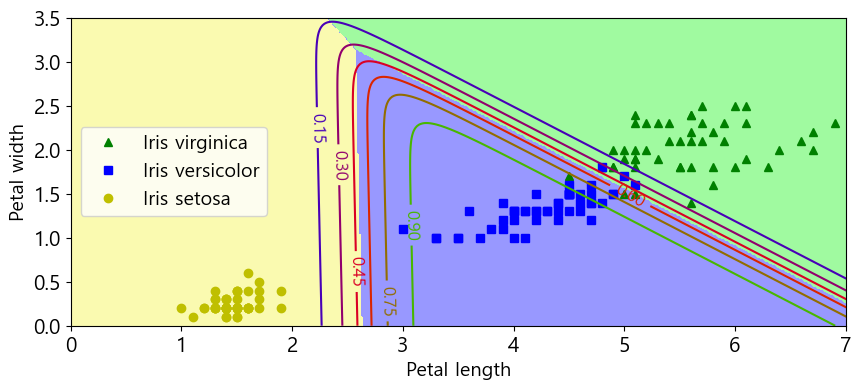

In [62]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

- 선은 Iris versicolor에 대한 확률 경계임